In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('./data/20190701pal_csv/20190701pal.csv')

In [3]:
df.head(20)

,Time Stamp,Time Zone,Name,PTID,Load
0,07/01/2019 00:00:00,EDT,CAPITL,61757,1199.3
1,07/01/2019 00:00:00,EDT,CENTRL,61754,1438.0
2,07/01/2019 00:00:00,EDT,DUNWOD,61760,700.3
3,07/01/2019 00:00:00,EDT,GENESE,61753,952.1
4,07/01/2019 00:00:00,EDT,HUD VL,61758,1010.3
5,07/01/2019 00:00:00,EDT,LONGIL,61762,2411.7
6,07/01/2019 00:00:00,EDT,MHK VL,61756,708.0
7,07/01/2019 00:00:00,EDT,MILLWD,61759,311.9
8,07/01/2019 00:00:00,EDT,N.Y.C.,61761,6165.6
9,07/01/2019 00:00:00,EDT,NORTH,61755,487.7


In [4]:
df = df.rename(columns = {"Time Stamp": "Date", "Time Zone": "TimeZone"})

In [5]:
df.Date = pd.to_datetime(df.Date)

In [6]:
# df.set_index('Date', inplace = True)

In [7]:
df.shape

(3564, 5)

In [8]:
df.drop(columns = 'PTID', inplace=True)

In [9]:
df.head()

,Date,TimeZone,Name,Load
0,2019-07-01,EDT,CAPITL,1199.3
1,2019-07-01,EDT,CENTRL,1438.0
2,2019-07-01,EDT,DUNWOD,700.3
3,2019-07-01,EDT,GENESE,952.1
4,2019-07-01,EDT,HUD VL,1010.3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3564 entries, 0 to 3563
Data columns (total 4 columns):
Date        3564 non-null datetime64[ns]
TimeZone    3564 non-null object
Name        3564 non-null object
Load        3564 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 111.5+ KB


In [11]:
df.Name.nunique()

11

In [12]:
reg = df.Name.unique().tolist()

In [13]:
df_2 = df.groupby(df.Date).sum()

In [14]:
df_2.shape

(324, 1)

In [15]:
for i in reg:
    df_bill = df.groupby(['Date', df['Name'].loc[df.Name == i]]).sum()    
    df_bill.reset_index(inplace=True)
    df_bill.set_index('Date', inplace=True)
    df_2[i] = df_bill['Load']

In [16]:
# df_bill = df.groupby(['Date', df['Name'].loc[df.Name == 'CAPITL']]).sum()
# df_bill.head()
# df_bill.reset_index(inplace=True)
# df_bill.set_index('Date', inplace=True)
# df_bill.head()
# df_2['CAPITL'] = df_bill['Load']

In [17]:
df_2.head()

,Load,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,WEST
Date,,,,,,,,,,,,
2019-07-01 00:00:00,16908.7,1199.3,1438.0,700.3,952.1,1010.3,2411.7,708.0,311.9,6165.6,487.7,1523.8
2019-07-01 00:04:56,16788.0,1187.2,1436.4,670.3,951.0,1011.2,2396.2,698.1,309.1,6118.3,494.2,1516.0
2019-07-01 00:05:00,16729.9,1192.7,1455.7,678.2,940.2,992.6,2369.6,701.7,300.9,6118.0,488.2,1492.1
2019-07-01 00:10:00,16739.0,1184.0,1452.7,679.9,949.4,1014.3,2368.6,691.8,300.6,6112.4,488.2,1497.1
2019-07-01 00:14:14,16635.9,1176.0,1462.6,683.1,937.1,991.3,2356.0,684.4,297.8,6075.1,488.5,1484.0


In [18]:
df_2.shape

(324, 12)

In [19]:
df_2 = df_2.rename(columns = {"Load": "Total_Load"})

In [20]:
#garbo for now



from matplotlib import pyplot as plt
# import seaborn as sns
# %matplotlib inline 
# x = df_2.index
# sns.pairplot(df_2,
#              x_vars= x,
#              y_vars='Load',
#              height=5,
#              plot_kws={'alpha':.9, 'linewidth':0}
#             )
# plt.suptitle('something')
# plt.show()

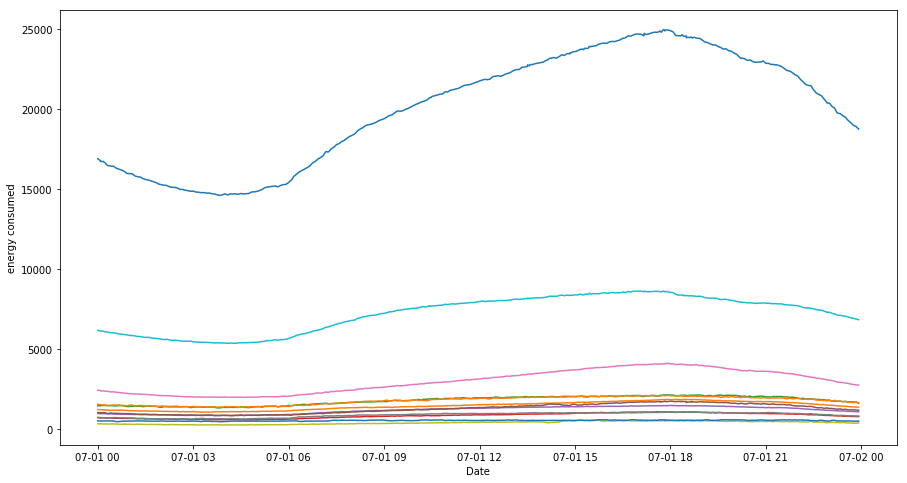

In [21]:
plt.figure(figsize=(15,8))
plt.xlabel('Date')
plt.ylabel('energy consumed')
plt.plot(df_2.index,df_2)
plt.show()

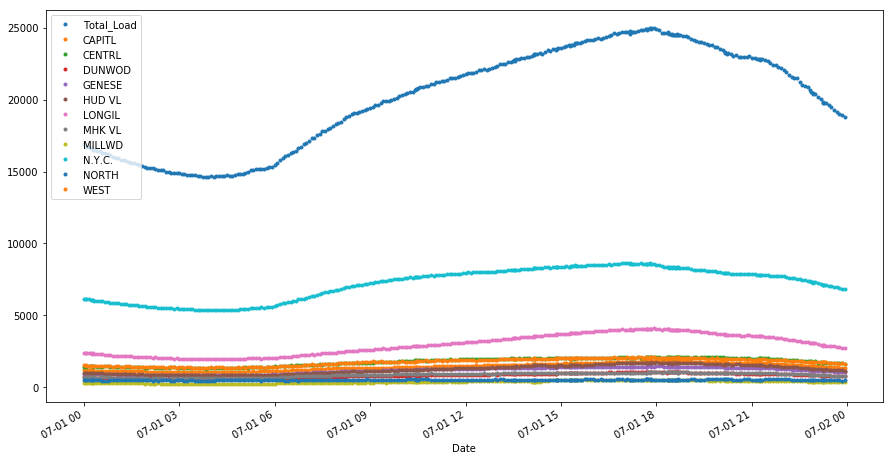

In [22]:
df_2.plot(style='.', figsize=(15, 8))
plt.show()

In [23]:
import glob
import os

    
path = r'/Users/danielmartinez/Course/cap_proj/data/' # use your path
all_files = glob.glob(os.path.join(path, "*/*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
new_df = pd.concat(df_from_each_file, ignore_index=True)

In [24]:
new_df.shape

(19791028, 5)

In [25]:
new_df.describe()

,PTID,Load
count,1.949684e+07,1.979040e+07
mean,6.175686e+04,1.704645e+03
std,3.108808e+00,1.729259e+03
min,6.175200e+04,-4.381300e+03
25%,6.175400e+04,7.508000e+02
50%,6.175700e+04,1.192100e+03
75%,6.176000e+04,1.864400e+03
max,6.176200e+04,1.526900e+04


In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19791028 entries, 0 to 19791027
Data columns (total 5 columns):
Time Stamp    object
Time Zone     object
Name          object
PTID          float64
Load          float64
dtypes: float64(2), object(3)
memory usage: 755.0+ MB


In [27]:
new_df = new_df.rename(columns = {"Time Stamp": "Date", "Time Zone": "TimeZone"})

In [28]:
names = new_df.Name.unique().tolist()

In [29]:
new_df.Date = pd.to_datetime(new_df.Date)

In [30]:
df_3 = new_df.groupby(new_df.Date).sum()

In [31]:
for i in names:
    temp = new_df.groupby(['Date', new_df['Name'].loc[new_df.Name == i]]).sum()    
    temp.reset_index(inplace=True)
    temp.set_index('Date', inplace=True)
    df_3[i] = temp['Load']

In [32]:
df_3.shape

(1825746, 14)

In [33]:
df_3.head()

,PTID,Load,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,WEST,N.Y.C._LONGIL
Date,,,,,,,,,,,,,,
2003-01-01 00:00:00,555804.0,15913.0,1128.0,1662.0,640.0,963.0,1109.0,NaN,665.0,241.0,NaN,752.0,1593.0,7160.0
2003-01-01 00:00:51,555804.0,15696.0,1090.0,1635.0,623.0,966.0,1094.0,NaN,672.0,234.0,NaN,723.0,1560.0,7099.0
2003-01-01 00:05:21,555804.0,15744.0,1109.0,1655.0,628.0,961.0,1075.0,NaN,657.0,235.0,NaN,737.0,1575.0,7112.0
2003-01-01 00:06:51,555804.0,15711.0,1105.0,1635.0,629.0,957.0,1056.0,NaN,666.0,234.0,NaN,732.0,1598.0,7099.0
2003-01-01 00:08:21,555804.0,15573.0,1102.0,1616.0,630.0,958.0,1047.0,NaN,675.0,235.0,NaN,720.0,1553.0,7037.0


In [34]:
df_3.drop(columns = ['PTID'], inplace = True)

In [35]:
df_3.head()

,Load,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,WEST,N.Y.C._LONGIL
Date,,,,,,,,,,,,,
2003-01-01 00:00:00,15913.0,1128.0,1662.0,640.0,963.0,1109.0,NaN,665.0,241.0,NaN,752.0,1593.0,7160.0
2003-01-01 00:00:51,15696.0,1090.0,1635.0,623.0,966.0,1094.0,NaN,672.0,234.0,NaN,723.0,1560.0,7099.0
2003-01-01 00:05:21,15744.0,1109.0,1655.0,628.0,961.0,1075.0,NaN,657.0,235.0,NaN,737.0,1575.0,7112.0
2003-01-01 00:06:51,15711.0,1105.0,1635.0,629.0,957.0,1056.0,NaN,666.0,234.0,NaN,732.0,1598.0,7099.0
2003-01-01 00:08:21,15573.0,1102.0,1616.0,630.0,958.0,1047.0,NaN,675.0,235.0,NaN,720.0,1553.0,7037.0


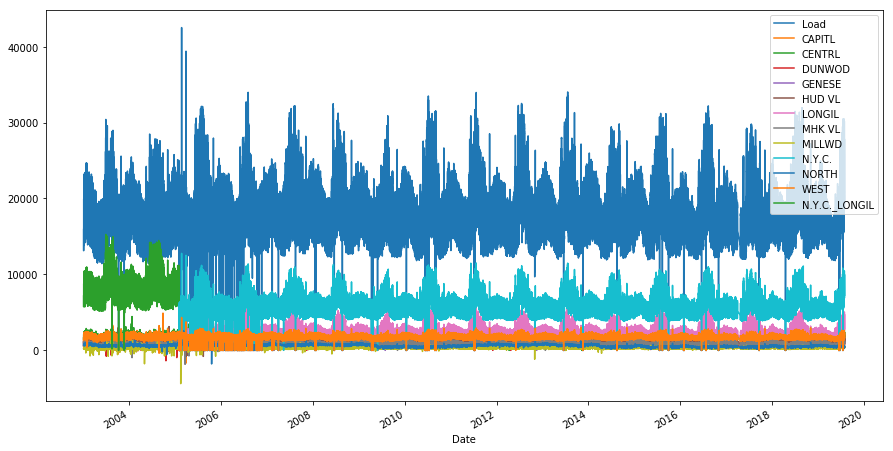

In [36]:
df_3.plot(kind = 'line', figsize=(15, 8))
plt.show()

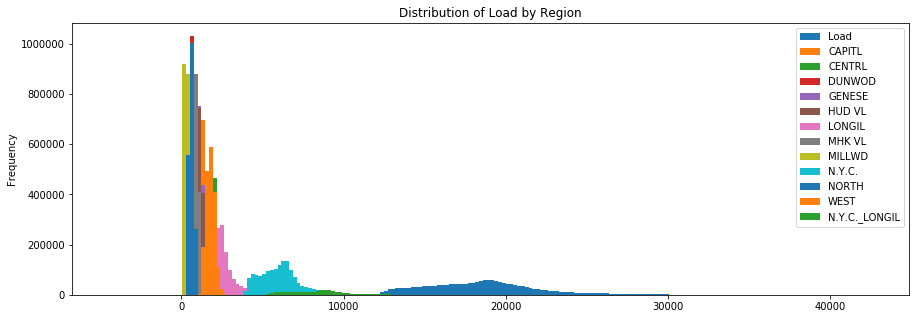

In [37]:
df_3.plot.hist(figsize=(15, 5), bins=200, title='Distribution of Load by Region')
plt.show()

In [38]:
hours = df_3.resample("H")

In [39]:
hours_ = hours.mean()

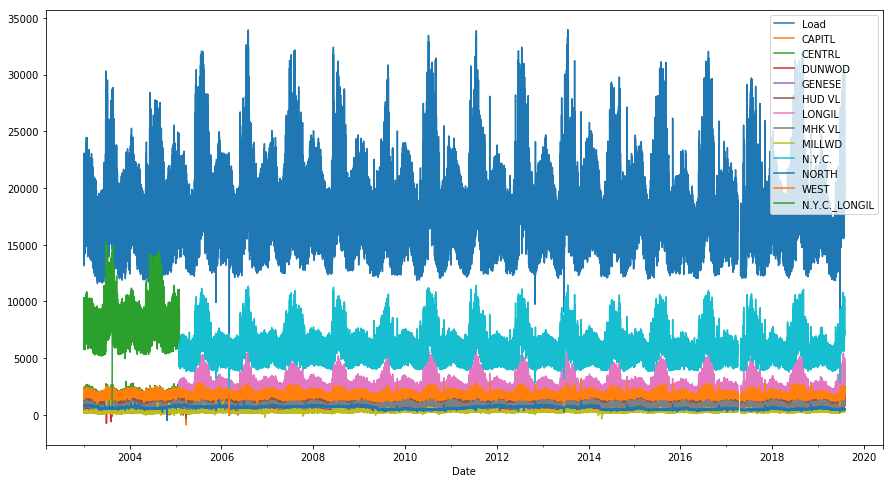

In [40]:
hours_.plot(kind = 'line', figsize=(15, 8))
plt.show()

In [41]:
hours_.shape

(145344, 13)

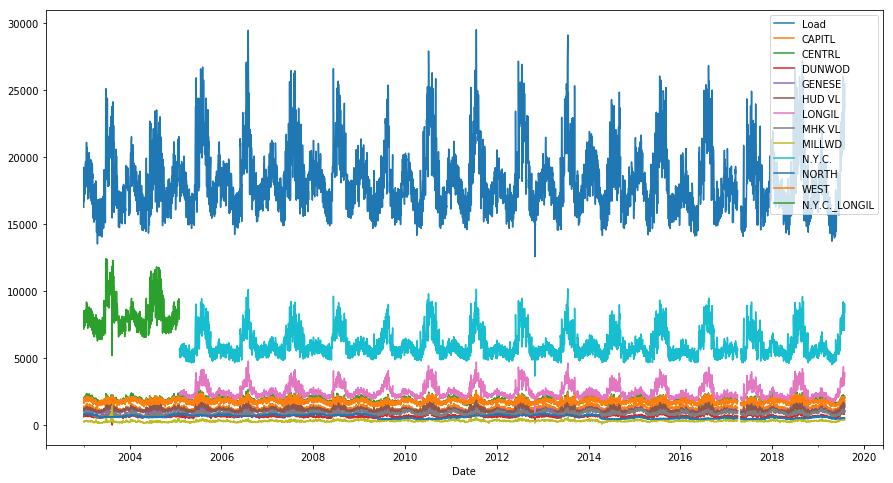

In [42]:
months = df_3.resample("D")
months_=months.mean()
months_.plot(kind = 'line', figsize=(15, 8))
plt.show()

In [54]:
df_3.head()

,Load,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,WEST,N.Y.C._LONGIL
Date,,,,,,,,,,,,,
2003-01-01 00:00:00,15913.0,1128.0,1662.0,640.0,963.0,1109.0,NaN,665.0,241.0,NaN,752.0,1593.0,7160.0
2003-01-01 00:00:51,15696.0,1090.0,1635.0,623.0,966.0,1094.0,NaN,672.0,234.0,NaN,723.0,1560.0,7099.0
2003-01-01 00:05:21,15744.0,1109.0,1655.0,628.0,961.0,1075.0,NaN,657.0,235.0,NaN,737.0,1575.0,7112.0
2003-01-01 00:06:51,15711.0,1105.0,1635.0,629.0,957.0,1056.0,NaN,666.0,234.0,NaN,732.0,1598.0,7099.0
2003-01-01 00:08:21,15573.0,1102.0,1616.0,630.0,958.0,1047.0,NaN,675.0,235.0,NaN,720.0,1553.0,7037.0


In [60]:
idx = pd.date_range('2017-04-01', periods=(24)*24, freq='H')
df_april = pd.DataFrame(idx, columns=['Date'])

In [61]:
cols = df_3.columns.tolist()

In [62]:
len(cols)

13

In [63]:
df_april.shape

(576, 1)

In [64]:
# df_april = pd.DataFrame(df_index)
df_jenna=pd.DataFrame(np.zeros((df_april.shape[0], 13)))

In [65]:
df_jenna.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
df_april.head()

,Date
0,2017-04-01 00:00:00
1,2017-04-01 01:00:00
2,2017-04-01 02:00:00
3,2017-04-01 03:00:00
4,2017-04-01 04:00:00


In [67]:
df_april = pd.concat([df_april, df_jenna], axis = 1)

In [68]:
df_april.set_index('Date', inplace=True)

In [69]:
df_april.columns = cols

In [70]:
df_april.shape

(576, 13)

In [71]:
df_april.head()

,Load,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,WEST,N.Y.C._LONGIL
Date,,,,,,,,,,,,,
2017-04-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
x = hours_['2016-04-01':'2016-04-24']

In [73]:
x.head()

,Load,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,WEST,N.Y.C._LONGIL
Date,,,,,,,,,,,,,
2016-04-01 00:00:00,13826.000000,1022.058333,1450.633333,494.316667,852.916667,843.116667,1723.400000,660.283333,237.633333,4588.558333,418.541667,1534.541667,NaN
2016-04-01 01:00:00,13197.700000,981.833333,1410.250000,472.233333,816.208333,796.200000,1630.191667,625.008333,229.491667,4346.116667,413.950000,1476.216667,NaN
2016-04-01 02:00:00,12848.683333,960.550000,1381.500000,457.208333,794.258333,779.441667,1573.191667,614.583333,223.025000,4205.250000,409.950000,1449.725000,NaN
2016-04-01 03:00:00,12671.800000,954.841667,1375.241667,458.350000,789.008333,775.358333,1541.525000,601.541667,214.375000,4120.583333,400.091667,1440.883333,NaN
2016-04-01 04:00:00,12789.816667,973.733333,1394.275000,458.191667,804.691667,780.900000,1557.075000,612.883333,213.016667,4142.691667,400.700000,1451.658333,NaN


In [74]:
x.shape

(576, 13)

In [75]:
x.index = idx

In [76]:
y = hours_['2015-04-01':'2015-04-24']

In [77]:
y.head()

,Load,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,WEST,N.Y.C._LONGIL
Date,,,,,,,,,,,,,
2015-04-01 00:00:00,15447.558333,1234.250000,1668.250000,565.825000,959.258333,990.608333,1932.216667,821.775000,262.708333,4832.941667,502.791667,1676.933333,NaN
2015-04-01 01:00:00,14869.158333,1200.391667,1642.250000,536.366667,930.575000,964.958333,1836.591667,805.725000,255.908333,4571.425000,497.833333,1627.133333,NaN
2015-04-01 02:00:00,14576.325000,1191.066667,1634.166667,531.866667,914.150000,950.341667,1791.550000,790.416667,245.883333,4429.641667,500.058333,1597.183333,NaN
2015-04-01 03:00:00,14491.500000,1194.850000,1614.016667,526.308333,913.650000,944.225000,1776.016667,797.833333,246.650000,4374.866667,502.741667,1600.341667,NaN
2015-04-01 04:00:00,14692.133333,1222.883333,1647.808333,528.608333,932.500000,958.400000,1806.116667,818.175000,250.433333,4401.683333,509.208333,1616.316667,NaN


In [78]:
y.shape

(576, 13)

In [79]:
y.index=idx

In [80]:
z = hours_['2014-04-01':'2014-04-24']

In [81]:
z.shape

(576, 13)

In [82]:
z.head()

,Load,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,WEST,N.Y.C._LONGIL
Date,,,,,,,,,,,,,
2014-04-01 00:00:00,15052.641667,1121.158333,1625.075000,602.925000,957.733333,906.833333,1950.566667,790.400000,197.941667,4783.808333,518.758333,1597.441667,NaN
2014-04-01 01:00:00,14460.241667,1088.591667,1596.316667,556.650000,928.775000,873.458333,1847.191667,775.241667,206.925000,4516.858333,516.666667,1553.566667,NaN
2014-04-01 02:00:00,14111.100000,1078.208333,1566.675000,530.800000,913.741667,852.066667,1794.216667,755.400000,216.333333,4349.175000,512.066667,1542.416667,NaN
2014-04-01 03:00:00,14024.458333,1073.166667,1576.825000,521.150000,914.966667,845.025000,1771.408333,756.758333,226.591667,4282.816667,511.600000,1544.150000,NaN
2014-04-01 04:00:00,14244.308333,1100.750000,1614.466667,540.466667,937.583333,862.341667,1801.175000,786.416667,215.841667,4306.550000,516.416667,1562.300000,NaN


In [83]:
z.index = idx

In [84]:
df_april = (x+y+z)/3

In [85]:
df_april.head()

,Load,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,WEST,N.Y.C._LONGIL
2017-04-01 00:00:00,14775.400000,1125.822222,1581.319444,554.355556,923.302778,913.519444,1868.727778,757.486111,232.761111,4735.102778,480.030556,1602.972222,NaN
2017-04-01 01:00:00,14175.700000,1090.272222,1549.605556,521.750000,891.852778,878.205556,1771.325000,735.325000,230.775000,4478.133333,476.150000,1552.305556,NaN
2017-04-01 02:00:00,13845.369444,1076.608333,1527.447222,506.625000,874.050000,860.616667,1719.652778,720.133333,228.413889,4328.022222,474.025000,1529.775000,NaN
2017-04-01 03:00:00,13729.252778,1074.286111,1522.027778,501.936111,872.541667,854.869444,1696.316667,718.711111,229.205556,4259.422222,471.477778,1528.458333,NaN
2017-04-01 04:00:00,13908.752778,1099.122222,1552.183333,509.088889,891.591667,867.213889,1721.455556,739.158333,226.430556,4283.641667,475.441667,1543.425000,NaN


In [86]:
final_df = pd.concat([hours_, df_april])

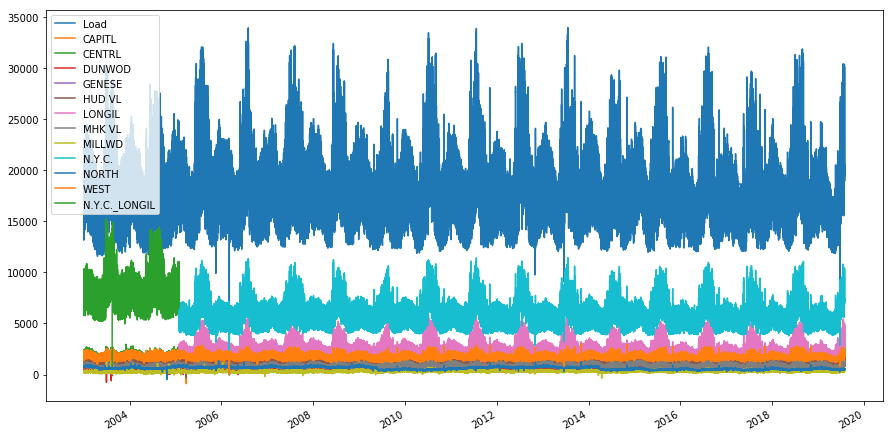

In [87]:
final_df.plot(kind = 'line', figsize=(15, 8))
plt.show()

In [89]:
final_df.head()

,Load,CAPITL,CENTRL,DUNWOD,GENESE,HUD VL,LONGIL,MHK VL,MILLWD,N.Y.C.,NORTH,WEST,N.Y.C._LONGIL
2003-01-01 00:00:00,15415.625000,1083.437500,1606.750000,614.812500,945.687500,1047.000000,NaN,655.875000,227.875000,NaN,724.937500,1542.437500,6966.812500
2003-01-01 01:00:00,14569.928571,1031.928571,1528.928571,574.214286,889.357143,986.214286,NaN,604.785714,204.285714,NaN,720.214286,1460.928571,6569.071429
2003-01-01 02:00:00,13812.200000,987.866667,1464.933333,545.333333,853.733333,936.333333,NaN,573.133333,186.000000,NaN,700.133333,1383.666667,6181.066667
2003-01-01 03:00:00,13315.333333,968.733333,1427.866667,512.400000,828.066667,909.933333,NaN,544.466667,177.133333,NaN,703.933333,1352.800000,5890.000000
2003-01-01 04:00:00,13156.333333,969.133333,1424.800000,503.466667,821.666667,897.066667,NaN,546.133333,174.533333,NaN,709.066667,1342.466667,5768.000000


In [88]:
final_df.to_csv(r'/Users/danielmartinez/Course/cap_proj/data/data.csv')